In [1]:
import pandas as pd
from IPython import get_ipython
from model.utils import minimum_year_analysis, b_slope_analysis, gutenberch_richter_analysis

%matplotlib qt
# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

import model

In [2]:
USE_CACHED_FEATURES=True
MAGNITUDE_THRESHOLD=6.0
WINDOW_SIZE=100

In [5]:
df_f = model.load_data('../../data/DATA_2.csv')
df_n = model.load_data('../../data/DATA_2_north.csv')
df_s = model.load_data('../../data/DATA_2_south.csv')


In [11]:
df_f.count()

Magnitude    204806
Latitude     204806
Longitude    204806
Depth        204806
Datetime     204806
dtype: int64

In [12]:
df_f[df_f.Datetime.dt.year >= 1974][df_f.Magnitude >= 4.1].count()

C:\Users\fof\AppData\Local\Temp/ipykernel_7728/2249553866.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_f[df_f.Datetime.dt.year >= 1974][df_f.Magnitude >= 4.1].count()


Magnitude    24853
Latitude     24853
Longitude    24853
Depth        24853
Datetime     24853
dtype: int64

In [4]:
df_s[df_f.Datetime.dt.year >= 2017].count()

C:\Users\fof\AppData\Local\Temp/ipykernel_7728/1654141265.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_s[df_f.Datetime.dt.year >= 2017].count()


Magnitude    111950
Latitude     111950
Longitude    111950
Depth        111950
Datetime     111950
dtype: int64

In [132]:
df_s[df_f.Datetime.dt.year >= 2017][df_s.Magnitude >= 3.8].count()

C:\Users\fof\AppData\Local\Temp/ipykernel_13592/692048223.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_s[df_f.Datetime.dt.year >= 2017][df_s.Magnitude >= 3.8].count()


Magnitude    37175
Latitude     37175
Longitude    37175
Depth        37175
Datetime     37175
dtype: int64

# MEXICO

C:\Users\fof\PycharmProjects\SeismicPrediction\model\calculate_features.py:169: RuntimeWarning: invalid value encountered in longdouble_scalars
  return (unique_n * np.sum(unique_M * log_unique_N) - np.sum(unique_M) * np.sum(log_unique_N)) / ( np.power(np.sum(unique_M), 2) - (unique_n * np.sum(np.power(unique_M, 2))))


<Figure size 432x288 with 0 Axes>

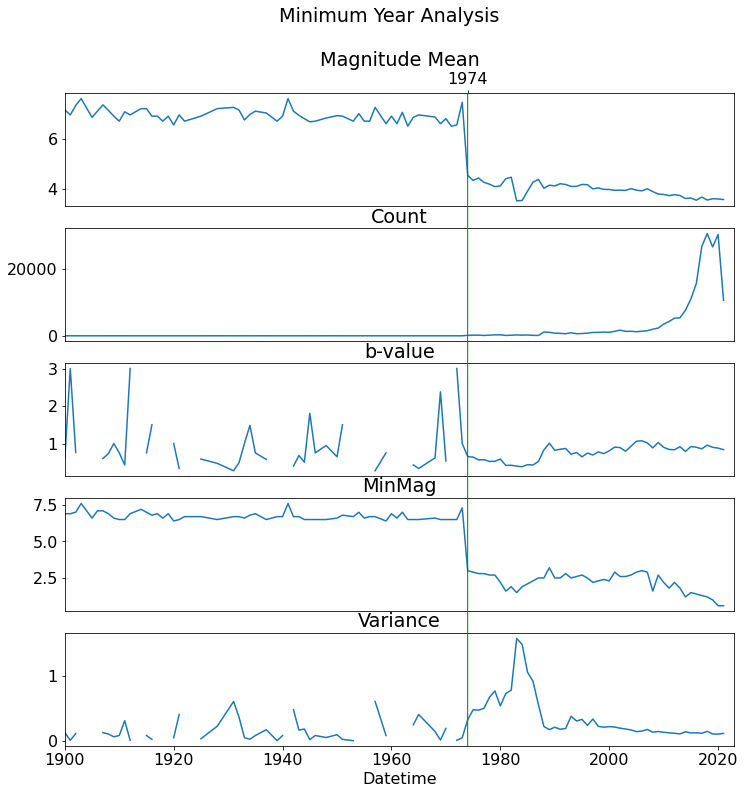

In [99]:
%matplotlib inline
minimum_year_analysis(df_f, [1974],[1900,2023])
df_f = df_f[df_f.Datetime.dt.year >= 1974]

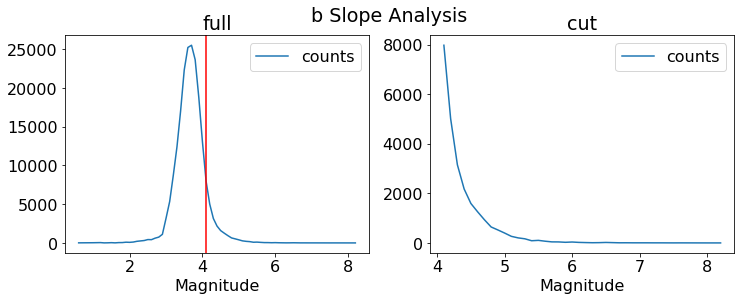

In [100]:
%matplotlib inline
b_slope_analysis(df_f, 4.1)

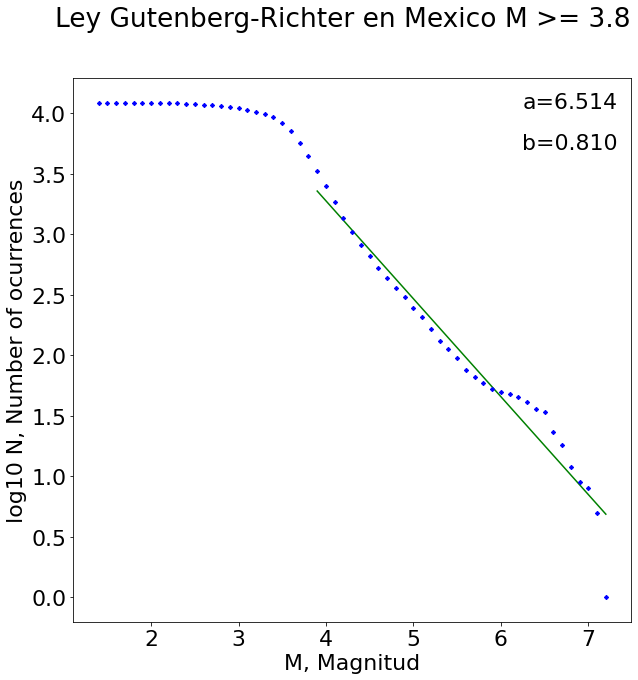

In [101]:
gutenberch_richter_analysis(df_n, 3.9)

# NORTH

C:\Users\fof\PycharmProjects\SeismicPrediction\model\calculate_features.py:169: RuntimeWarning: invalid value encountered in longdouble_scalars
  return (unique_n * np.sum(unique_M * log_unique_N) - np.sum(unique_M) * np.sum(log_unique_N)) / ( np.power(np.sum(unique_M), 2) - (unique_n * np.sum(np.power(unique_M, 2))))


<Figure size 432x288 with 0 Axes>

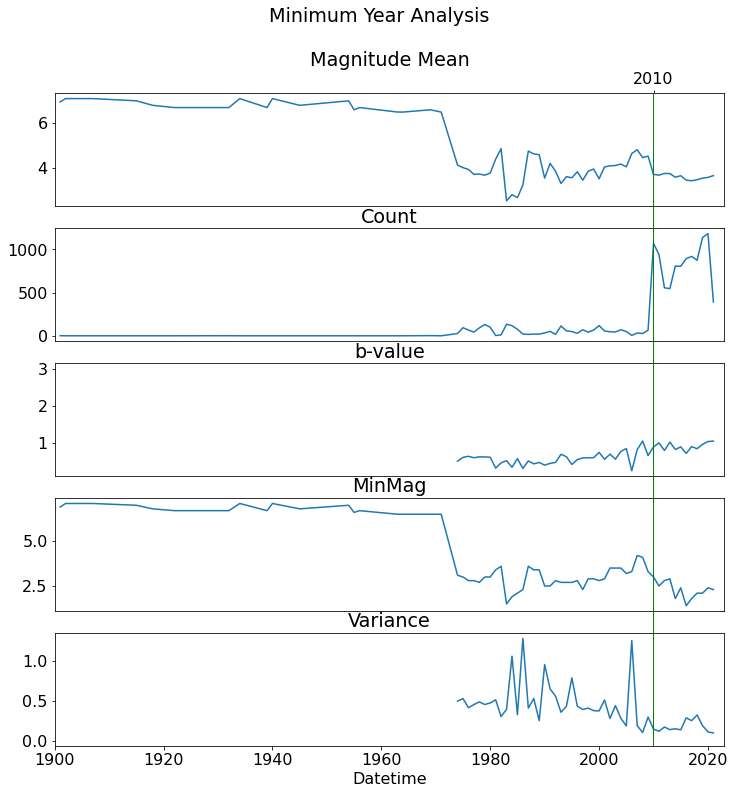

In [102]:
%matplotlib inline
minimum_year_analysis(df_n, [2010],[1900,2023])
df_n = df_n[df_n.Datetime.dt.year >= 2010]

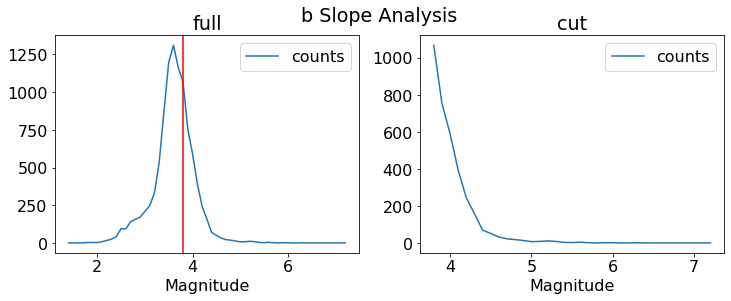

In [103]:
%matplotlib inline
b_slope_analysis(df_n, 3.8)

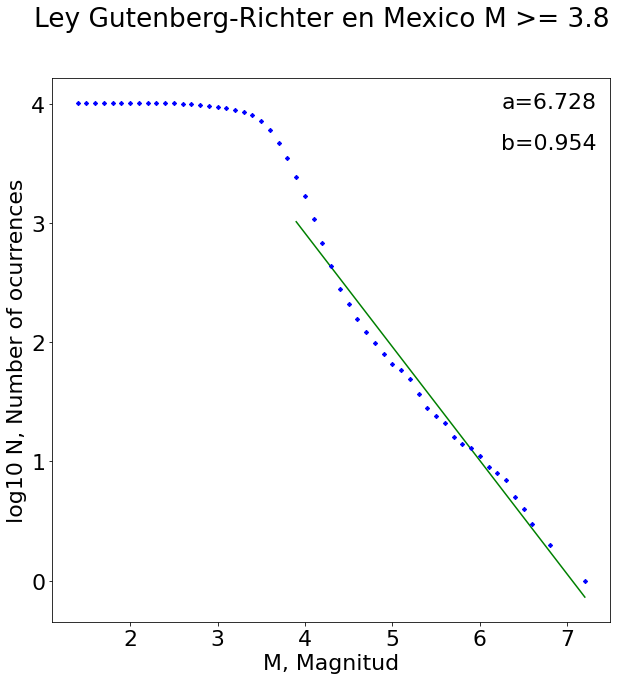

In [104]:
gutenberch_richter_analysis(df_n, 3.9)

# SOUTH

C:\Users\fof\PycharmProjects\SeismicPrediction\model\calculate_features.py:169: RuntimeWarning: invalid value encountered in longdouble_scalars
  return (unique_n * np.sum(unique_M * log_unique_N) - np.sum(unique_M) * np.sum(log_unique_N)) / ( np.power(np.sum(unique_M), 2) - (unique_n * np.sum(np.power(unique_M, 2))))


<Figure size 432x288 with 0 Axes>

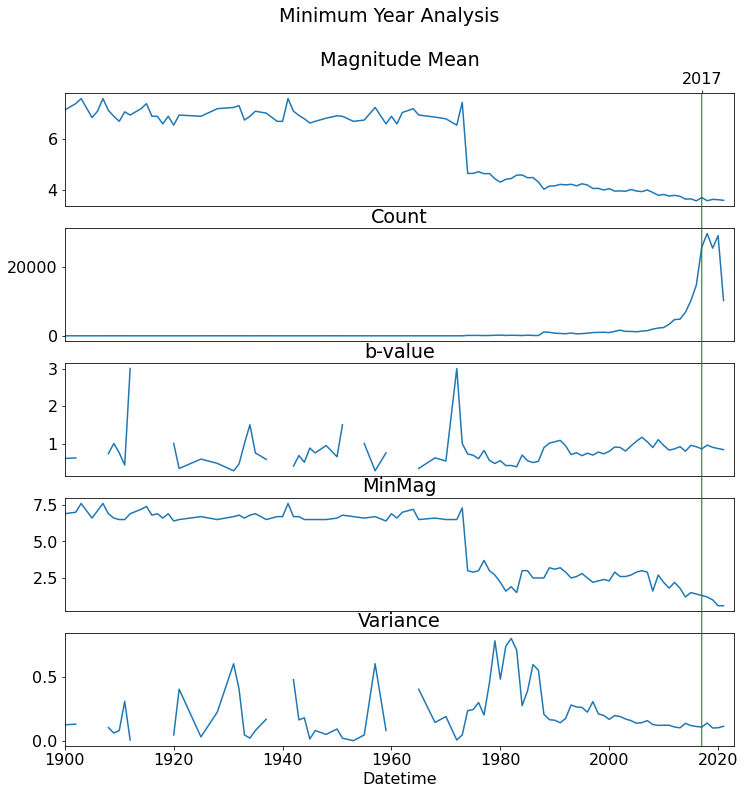

In [105]:
%matplotlib inline
minimum_year_analysis(df_s, [2017],[1900,2023])
df_s = df_s[df_s.Datetime.dt.year >= 2017]

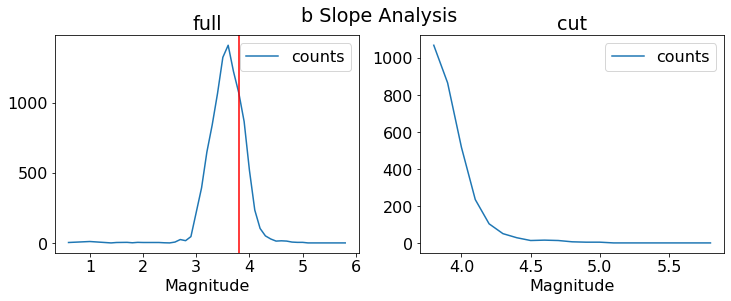

In [106]:
%matplotlib inline
b_slope_analysis(df_s[df_s.Datetime.dt.year == 2021], 3.8)

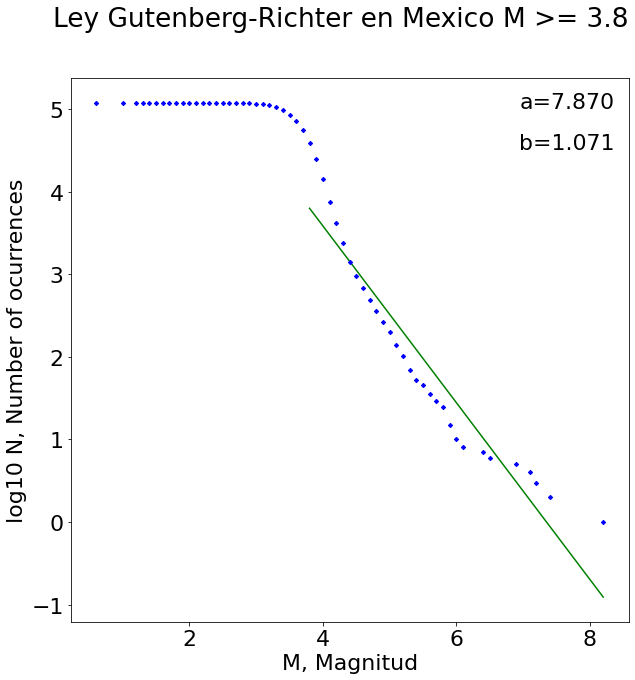

In [107]:
gutenberch_richter_analysis(df_s, 3.8)


$$ z = \dfrac{N_{a}\Delta T_{b}-N_{b}\Delta T_{a}}{\sqrt{N_{a}\Delta T_{b}^2+N_{b}\Delta T_{a}^2}} $$